# Mathematical Modelling Homework 1
Nathan Burwig <br>
Fall 2022 <br>
This file is homework #1 in MATH 087 at Tufts.

## Problem 1 description: <br>
A high-end gym wishes to offer a New Year’s special to all customers who sign up for a year
long membership before February 1st. The gym typically charges $150 a month and is trying
to decide how much of a discount to offer. It is estimated that for every $100 off the yearly
price, the number of gym memberships purchased will increase by 15 <br>

1. > How much of a discount will maximize the gyms profits on this special? Model
   question as a single-variable optimization problem.

We know that we want to maximize profit, so we can write a function for it <br>
$$f(n,k)=n \left( 1800 - k \right) \left(1 + \frac{0.15}{100}k\right)$$ 
This function characterizes our profit in terms of the number of people (n) and
discount in dollar amount (k)

### Problem 1a

In [41]:
class GymDiscount:
    def __init__(self, monthly_cost=150, discount_per=0.15/100):
        self.monthly_cost = monthly_cost
        self.discount_per = discount_per
    
    def report_parameters(self):
        # returning the parameters we use
        print("> montly cost:\t", self.monthly_cost)
        print("> discount per:\t", self.discount_per)
        print("\n")

    def discounted_price(self, discount):
        # the price after discount
        return (1800 - discount)

    def profit(self, discount, n = 100):
        # the profit from this discount
        return n * self.discounted_price(discount) * (1 + self.discount_per * discount)
    
g = GymDiscount()
g.report_parameters()

> montly cost:	 150
> discount per:	 0.0015




We can go ahead and use pandas here to create a dataframe. This will make
working and with large amounts of heterogenous data relatively straightforward

In [42]:
import pandas as pd

pd.set_option('display.float_format', lambda x: "{:,.2f}".format(x))

In [43]:
g = GymDiscount()

def gym_discounts(g, discount=range(550, 560)):
    return pd.DataFrame(
        {'$ amount discount'        : discount,
         'price of membership'      : map( lambda n: g.discounted_price(n) , discount),
         'profit'                   : map( lambda n: g.profit(n) , discount)
        },
        index=discount)
    

In [44]:
gym_discounts(g)

,$ amount discount,price of membership,profit
550,550,1250,"228,125.00"
551,551,1249,"228,129.85"
552,552,1248,"228,134.40"
553,553,1247,"228,138.65"
554,554,1246,"228,142.60"
555,555,1245,"228,146.25"
556,556,1244,"228,149.60"
557,557,1243,"228,152.65"
558,558,1242,"228,155.40"
559,559,1241,"228,157.85"


This dataframe is helpful, and while I've retrospectively changed the range of
entries to include the maximal value in the table above, below I choose a more
brute force method (of course, this can all be done rather simply with a bit of
calculus).

We will write a function that gets the maximum index from the dataframe
associated with the profit, then write another function to report the data back
to us.

In [45]:
def maximize_profit(g, discount=range(0,1000)):
    profits_df = gym_discounts(g, discount)
    max_index = profits_df['profit'].idxmax()

    return  profits_df.loc[max_index]

def report_maximum_profit(g, discount=range(0,1000)):
    r = maximize_profit(g)
    print("For discounts from $0 to $1000, given the following parameters: \n")
    g.report_parameters()
    print("the maximum profit is found in the following way: \n")
    print(str(r))
    

In [46]:
report_maximum_profit(g)

For discounts from $0 to $1000, given the following parameters: 

> montly cost:	 150
> discount per:	 0.0015


the maximum profit is found in the following way: 

$ amount discount         567.00
price of membership     1,233.00
profit                228,166.65
Name: 567, dtype: float64


So we can see, through this data, that the optimal discount to maximize profit
is 567$ or there abouts. To confirm, we can take the actual derivative of this
to find it's exact maximal value...

### Problem 1b

2. > Compute the sensitivity of the optimal discount and the corresponding profit to
the 15% assumption.

In order to compute the sensitivity of the optimal discount and corresponding
profit, we need to parameterize the 15% increase assumption. We can do this by
assuming that, in our profit formula, it is not $$f(n,k)=n \left( 1800 - k
\right) \left(1 + \frac{0.15}{100}k\right)$$ 
But rather, that it can be parameterized by the folliwing... <br>
$$f(n,k)=n \left( 1800 - k \right) \left(1 + \frac{m}{100}k\right)$$ 

After some deliberation, I have decided that for symbolic calculations I will
defer to Mathematica, as doing so in sympy seems unecessarily complex all things
considered... <br>

We arrive at the following expression for k... <br>
$$ k(m)= \frac{50(18m-1)}{m}$$
Note, $k(0.15) = 566.667$ which is exactly the value we would expect given our
previous calculations <br>

From here we can calculate the Sensitivity as: <br>
$$S(k,m)=\dfrac{dk(m)}{dm}\frac{m}{k(m)} = \frac{1}{18m-1}$$

Thus giving us a sensitivity of: <br>
$$S(k,0.15)=0.588

### Problem 1c
3. > Suppose that the special only generates a 10% increase in sales per $100. What is the
effect?

p^2 q^2 r^2

We can quickly calculate the effect this would have by using the code we already
have setup, and simply pluggin in for `discount_per` as .10

In [47]:
g_1 = GymDiscount(150, .10/100)
report_maximum_profit(g_1)

For discounts from $0 to $1000, given the following parameters: 

> montly cost:	 150
> discount per:	 0.001


the maximum profit is found in the following way: 

$ amount discount         400.00
price of membership     1,400.00
profit                196,000.00
Name: 400, dtype: float64


So we can immediately see that the effect of changing our assumption regarding
the percentage increase of subcriptions per dollar amount of discount, has cause
the optimal price to change from $1233.00 to $1400.00 <br>

We could also have calculated this by taking $k(0.10)$ which would would find
equals to optimal discount of $400

In [48]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def draw_graph(f,x,y,x0,y0,elev_azim=[]):
    X,Y = np.meshgrid(x,y)

    fig = plt.figure(figsize=(len(elev_azim)*10,10))
    for idx,(e,a) in enumerate(elev_azim,start=1):
        
        ax = fig.add_subplot(1,len(elev_azim),idx,projection='3d',elev=e,azim=a)
        ax.plot_wireframe(X,Y,f(X,Y))

        ax.plot(x,y0*np.ones(y.shape), zs= f(x,y0), color="red", linewidth=3)
        ax.plot(x0*np.ones(x.shape),y, zs= f(x0,y), color="red", linewidth=3)
    
    return fig

In [49]:
def f(t,h):
    return -0.038 * t**2 - 0.223 * t * h - 10.982 * h**2 + 7.112 * t + 60.912 * h - 328.898

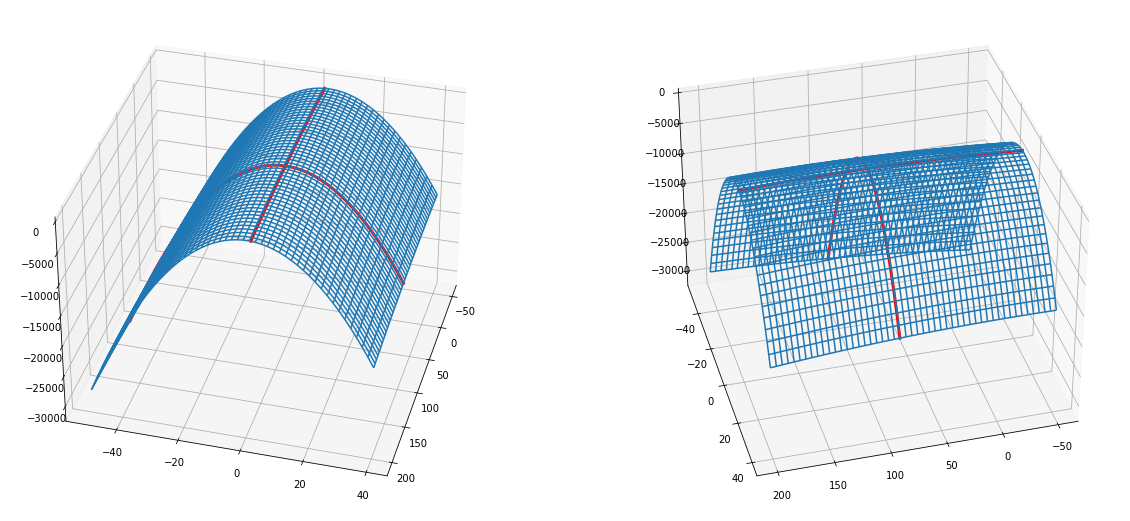

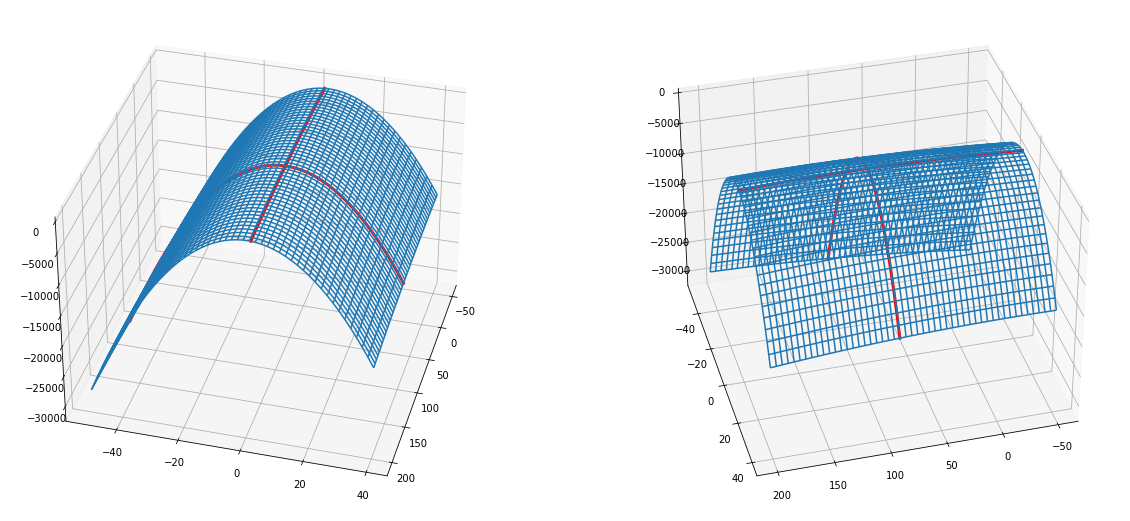

In [56]:
draw_graph(f,
           x=np.linspace(-50,200,50),
           y=np.linspace(-50,40,50),
           x0=88.065,
           y0=1.879,
           elev_azim=[(35,15),(35,75)])

In [55]:
A = np.array([[.076,.223],
              [.223,21.964]])
b = np.array([7.112,60.912])
np.linalg.solve(A,b)

array([88.06514956,  1.87914185])

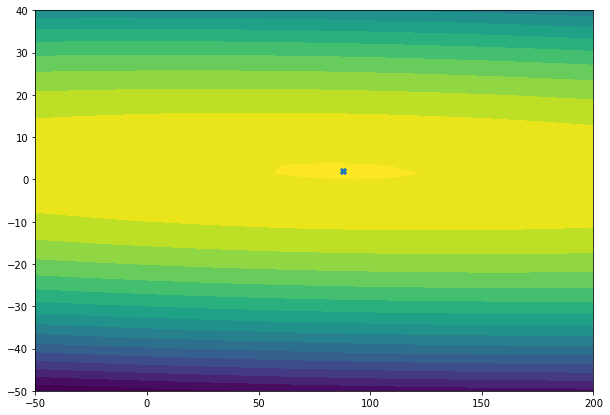

In [52]:
t = np.linspace(-50,200,50)
h = np.linspace(-50,40,50)

T,H = np.meshgrid(t,h)

figc = plt.figure(figsize=(10,7))
axc = figc.add_subplot()
axc.contourf(T, H, f(T,H), levels=20, extend = 'both')
axc.scatter(88.065, 1.879, marker="X")

In [53]:
def F(p,q):
    return 2 * p + 2*q -2*p*q

A = np.array([[4,2],
              [2,4]])
b = np.array([2,2])

np.linalg.solve(A,b)
print(A)

[[4 2]
 [2 4]]


In [54]:
M = np.array([[0, 2, 2, 1],
              [2, 0, 2 ,1],
              [2, 2, 0, 1],
              [1, 1, 1, 0]])
a = np.array([0, 0, 0, 1])
np.linalg.solve(M,a)

array([ 0.33333333,  0.33333333,  0.33333333, -1.33333333])